In [1]:
import pandas as pd #import needed libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#read file
df=pd.read_csv('E:\\New folder\\train.csv',header=0)
df.head()

,Type of section,w/t,fy,fu,bs/lc,Agv,Agt,Anv,Ant,Ago,Anc,Failure mode
0,1,15.9375,300,450,0.418684,2675.2,246.4,1830.4,169.6,632.32,478.720,0
1,1,15.9375,300,450,0.418684,2675.2,246.4,1830.4,169.6,632.32,478.720,0
2,1,15.9375,300,450,0.418684,2675.2,246.4,1830.4,169.6,632.32,478.720,0
3,1,15.8333,300,450,0.304474,2006.4,151.2,1372.8,93.6,353.28,238.018,0
4,1,15.9375,300,450,0.041868,2675.2,246.4,1830.4,169.6,632.32,478.720,0


In [3]:
#1.  using sectional area variables Ago and Anc only delete rest varibles

In [10]:
df.describe()

,Type of section,w/t,fy,fu,bs/lc,Agv,Agt,Anv,Ant,Ago,Anc,Failure mode
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.325000,13.575145,372.700000,508.50000,1.189343,2444.897425,311.359500,1662.789800,213.298190,661.564380,541.506030,0.400000
std,0.474342,2.876597,135.895548,105.21163,0.974296,2076.162707,168.407466,1459.170083,137.180661,333.359001,288.145392,0.496139
min,1.000000,5.368400,300.000000,450.00000,0.041868,471.000000,151.200000,258.600000,87.600000,353.280000,228.600000,0.000000
25%,1.000000,10.833300,300.000000,450.00000,0.390526,485.400000,165.750000,271.650000,94.725000,372.000000,321.420000,0.000000
50%,1.000000,14.416700,300.000000,450.00000,0.418684,2006.400000,246.400000,1372.800000,169.600000,492.000000,476.160000,0.000000
75%,2.000000,15.937500,346.000000,490.00000,2.277230,4012.800000,481.340000,2745.600000,339.200000,753.377150,936.815650,1.000000
max,2.000000,15.975000,640.000000,715.00000,3.176471,7942.000000,736.000000,5734.000000,582.400000,1264.640000,957.440000,1.000000


In [4]:
del df['w/t']

In [5]:
del df['fy']

In [6]:
del df['fu']

In [7]:
del df['Agv']

In [8]:
del df['Agt']

In [160]:
del df['Ant']

In [161]:
del df['Anv']

In [162]:
del df['bs/lc']

In [163]:
del df['Type of section']

In [164]:
print(df.groupby('Failure mode').size()) #24 posities and 36 negetives

Failure mode
0    24
1    16
dtype: int64


In [165]:
X=df.loc[:,df.columns!='Failure mode'] # varible x is all colun leaving the failure node
y=df['Failure mode']  #failure ode is our y varible which hneed to be predicted


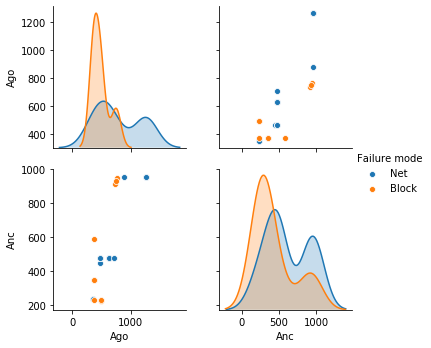

In [148]:
sns.pairplot(df,hue='Failure mode')

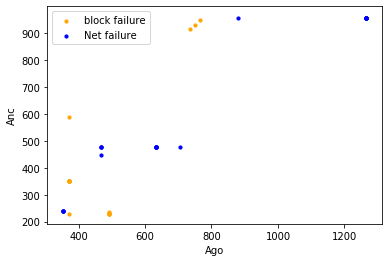

In [18]:
block_failure = df.loc[y == 1]
net_failure = df.loc[y == 0]

plt.xlabel("Ago")
plt.ylabel("Anc")

plt.scatter(block_failure.iloc[:, 0], block_failure.iloc[:, 1], s=10, label='block failure',color='orange')
plt.scatter(net_failure.iloc[:, 0], net_failure.iloc[:, 1], s=10, label='Net failure',color='blue')
plt.legend()
plt.show()


In [158]:
#logistic reg

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X,y)



c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
c=lr.intercept_


In [160]:
m = lr.coef_

In [161]:
y_pred=lr.predict(X)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[20,  4],
       [ 6, 10]], dtype=int64)

In [162]:
x = np.linspace(0, 1250)
expression_1 = (1./(1+np.exp(0.00535455*x-c)))
expression_2 = (1./(1+np.exp(-0.00317127*x-c)))

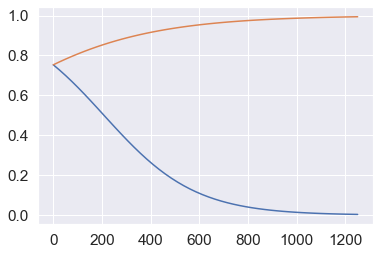

In [163]:
plt.plot(x,expression_1)
plt.plot(x,expression_2)

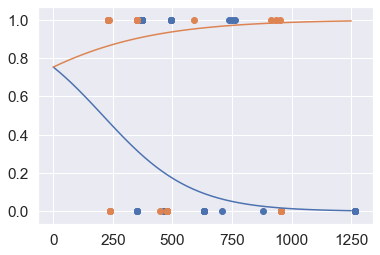

In [164]:
plt.plot(x,expression_1)
plt.plot(x,expression_2)
plt.scatter(df['Ago'],y)
plt.scatter(df['Anc'],y)

In [185]:
y_pred

array(['Net', 'Net', 'Net', 'Net', 'Net', 'Net', 'Net', 'block', 'Net',
       'Net', 'Net', 'Net', 'Net', 'Net', 'Net', 'Net', 'Net', 'Net',
       'Net', 'Net', 'Net', 'block', 'block', 'block', 'block', 'block',
       'block', 'Net', 'Net', 'block', 'block', 'block', 'Net', 'Net',
       'Net', 'block', 'block', 'block', 'Net', 'block'], dtype=object)

In [304]:
y_prob=lr.predict_proba(X)


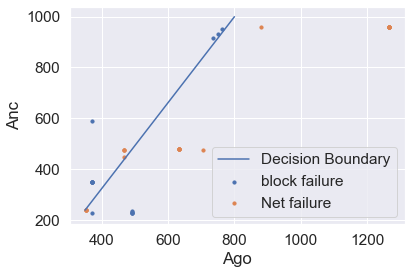

In [165]:
x = np.linspace(350, 800)

z = (-1.11514123 + 0.00535455*x)/0.00317127 

block_failure = df.loc[y == 1]
net_failure = df.loc[y == 0]

plt.xlabel("Ago")
plt.ylabel("Anc")

plt.plot(x, z, label='Decision Boundary')
plt.scatter(block_failure.iloc[:, 0], block_failure.iloc[:, 1], s=10, label='block failure')
plt.scatter(net_failure.iloc[:, 0], net_failure.iloc[:, 1], s=10, label='Net failure')
plt.legend()

 


In [15]:
X=np.array(X)
y=np.array(y) 

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


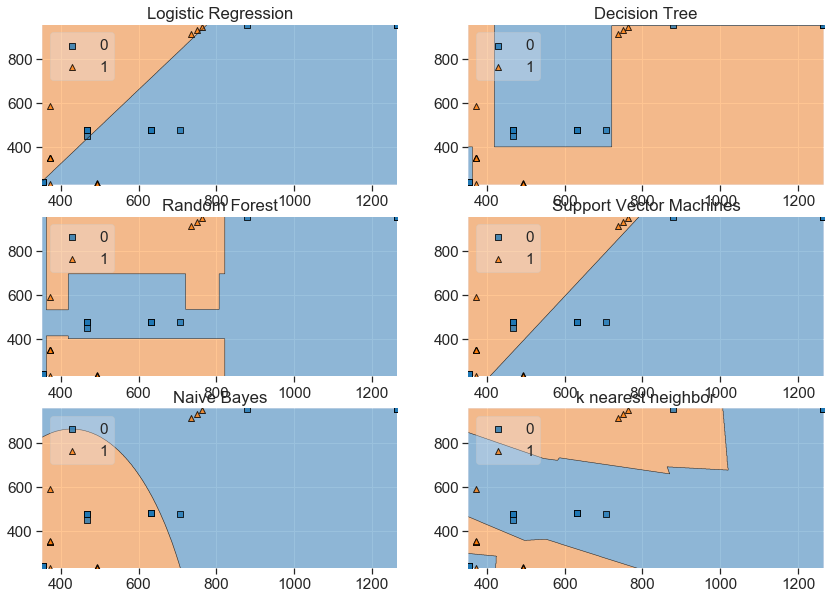

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
 
 
 
# Initializing Classifiers
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = SVC(kernel='linear', C=1, random_state=0)
clf5 = GaussianNB()
clf6 = KNeighborsClassifier(n_neighbors=3)
 
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline  
 
gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(14,10))
 
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'Naive Bayes', 'k nearest neighbor']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]):
 
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
 
plt.show()
 

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


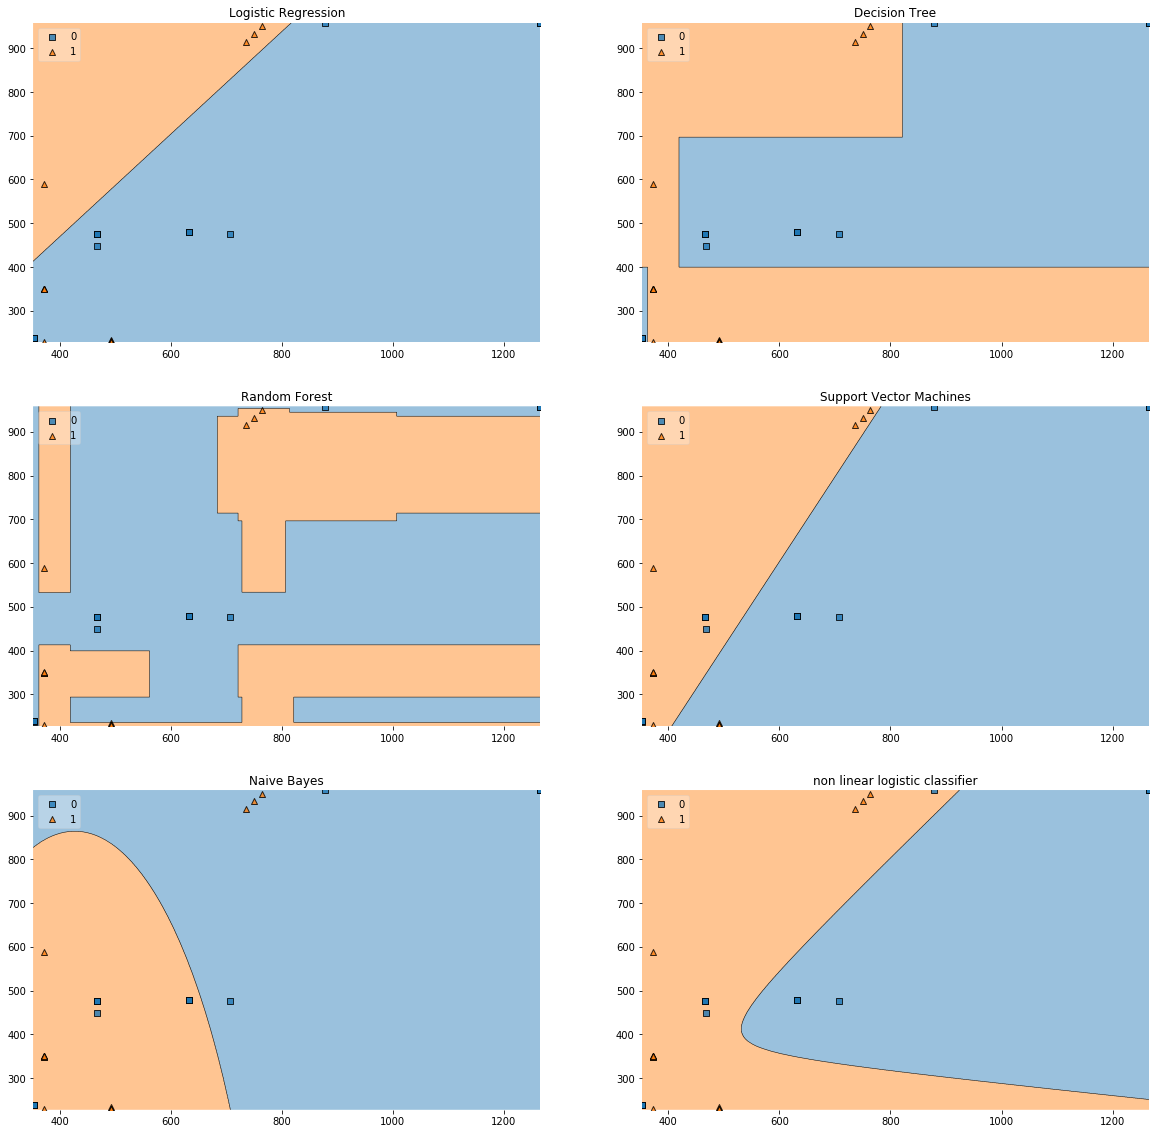

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

 
 
# Initializing Classifiers
clf1 = LogisticRegression(solver="saga")
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = SVC(kernel='linear', C=0.1, random_state=0)
clf5 = GaussianNB()
clf6 = QuadraticDiscriminantAnalysis(reg_param=0.8)

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline  
 
gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(20,20))
 
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 'Naive Bayes', 'non linear logistic classifier']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]):
 
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
 
plt.show()
 

In [58]:
y_pred=clf6.predict(X)
#y_pred =[1 if i>0.5 else 0 for i in y_pred]
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [65]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix

array([[15,  9],
       [ 0, 16]], dtype=int64)

In [44]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier()
clf2.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
from sklearn import tree
text_representation = tree.export_text(clf2)
print(text_representation)

|--- feature_1 <= 399.64
|   |--- feature_0 <= 362.64
|   |   |--- class: 0
|   |--- feature_0 >  362.64
|   |   |--- class: 1
|--- feature_1 >  399.64
|   |--- feature_0 <= 419.28
|   |   |--- class: 1
|   |--- feature_0 >  419.28
|   |   |--- feature_1 <= 696.73
|   |   |   |--- class: 0
|   |   |--- feature_1 >  696.73
|   |   |   |--- feature_0 <= 821.34
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  821.34
|   |   |   |   |--- class: 0



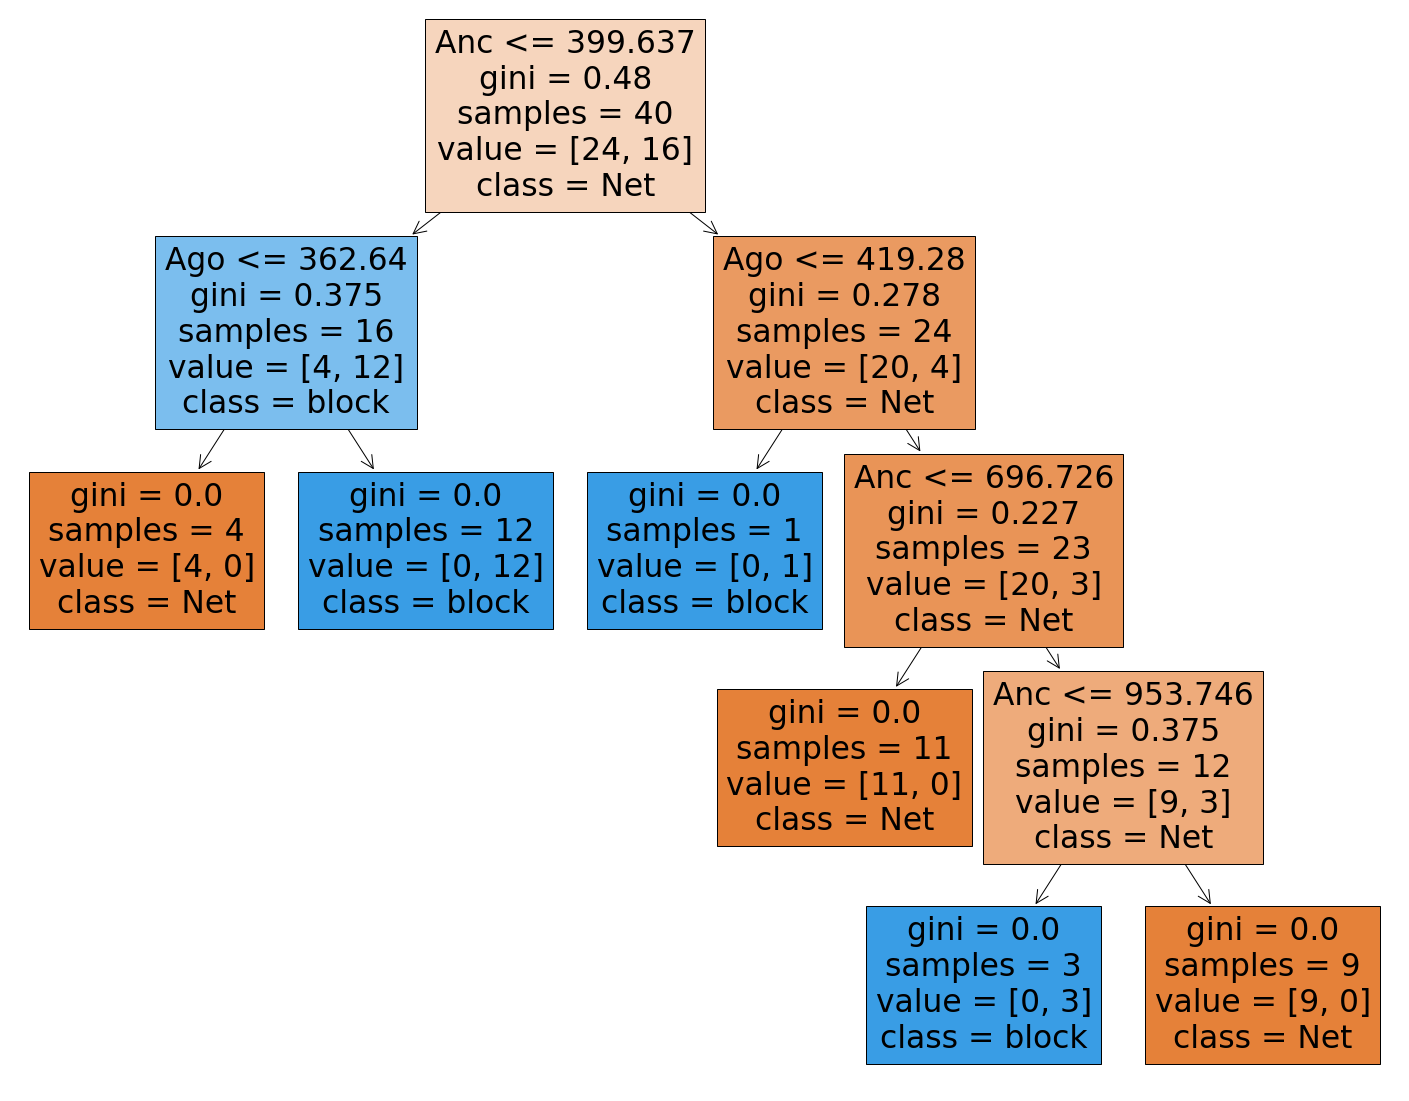

In [43]:
from sklearn.tree import plot_tree # tree diagram

feature_names = df.columns[:2]
target_names = df['Failure mode'].unique().tolist()

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf2, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

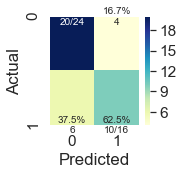

In [85]:

%matplotlib inline
from sklearn.metrics import confusion_matrix

def plot_cm(y, y_pred, figsize=(2,2)):
    cm = confusion_matrix(y, y_pred, labels=np.unique(y))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y), columns=np.unique(y))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y, y_pred)


In [66]:
clf1.coef_

array([[-0.00535455,  0.00317127]])

In [67]:
clf1.intercept_

array([1.11514123])

<Figure size 720x144 with 0 Axes>

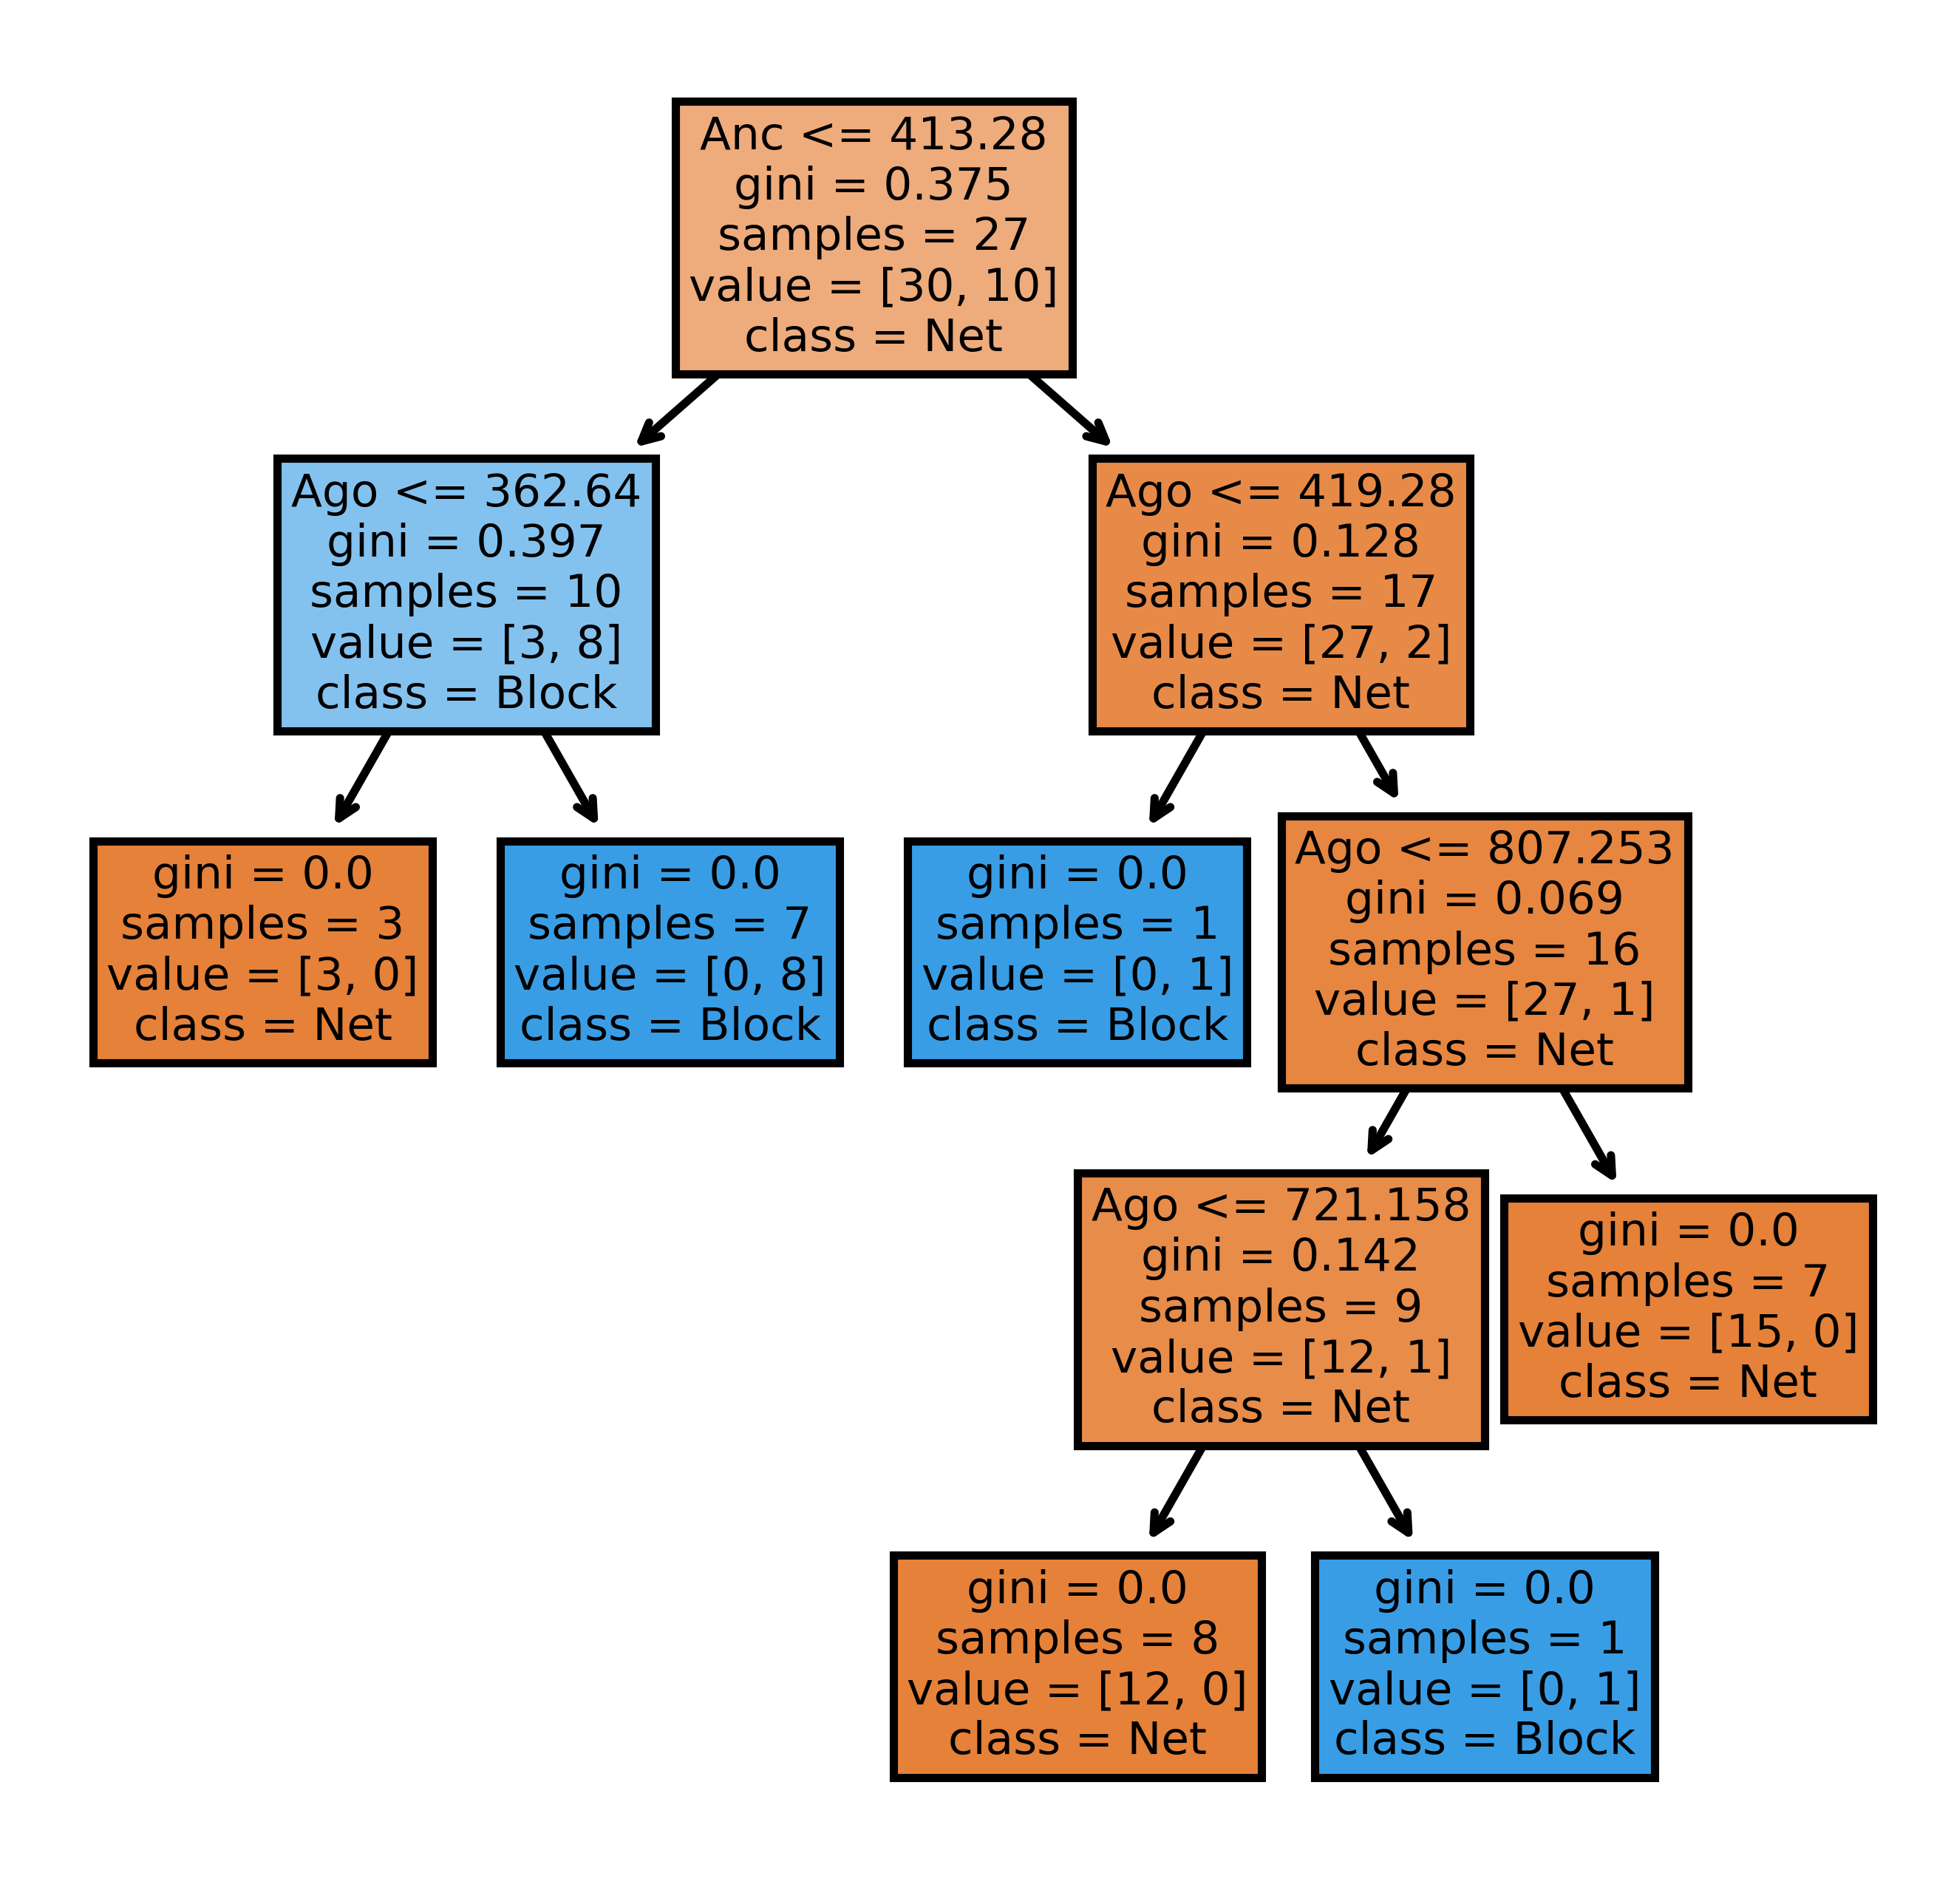

In [103]:
feature_names = df.columns[:2]
target_names = df['Failure mode'].unique().tolist()

plt.figure(figsize=(10,2))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf3.estimators_[9],
               feature_names = feature_names, 
               class_names=target_names,
               filled = True);
fig.savefig('rf_individualtree.png')

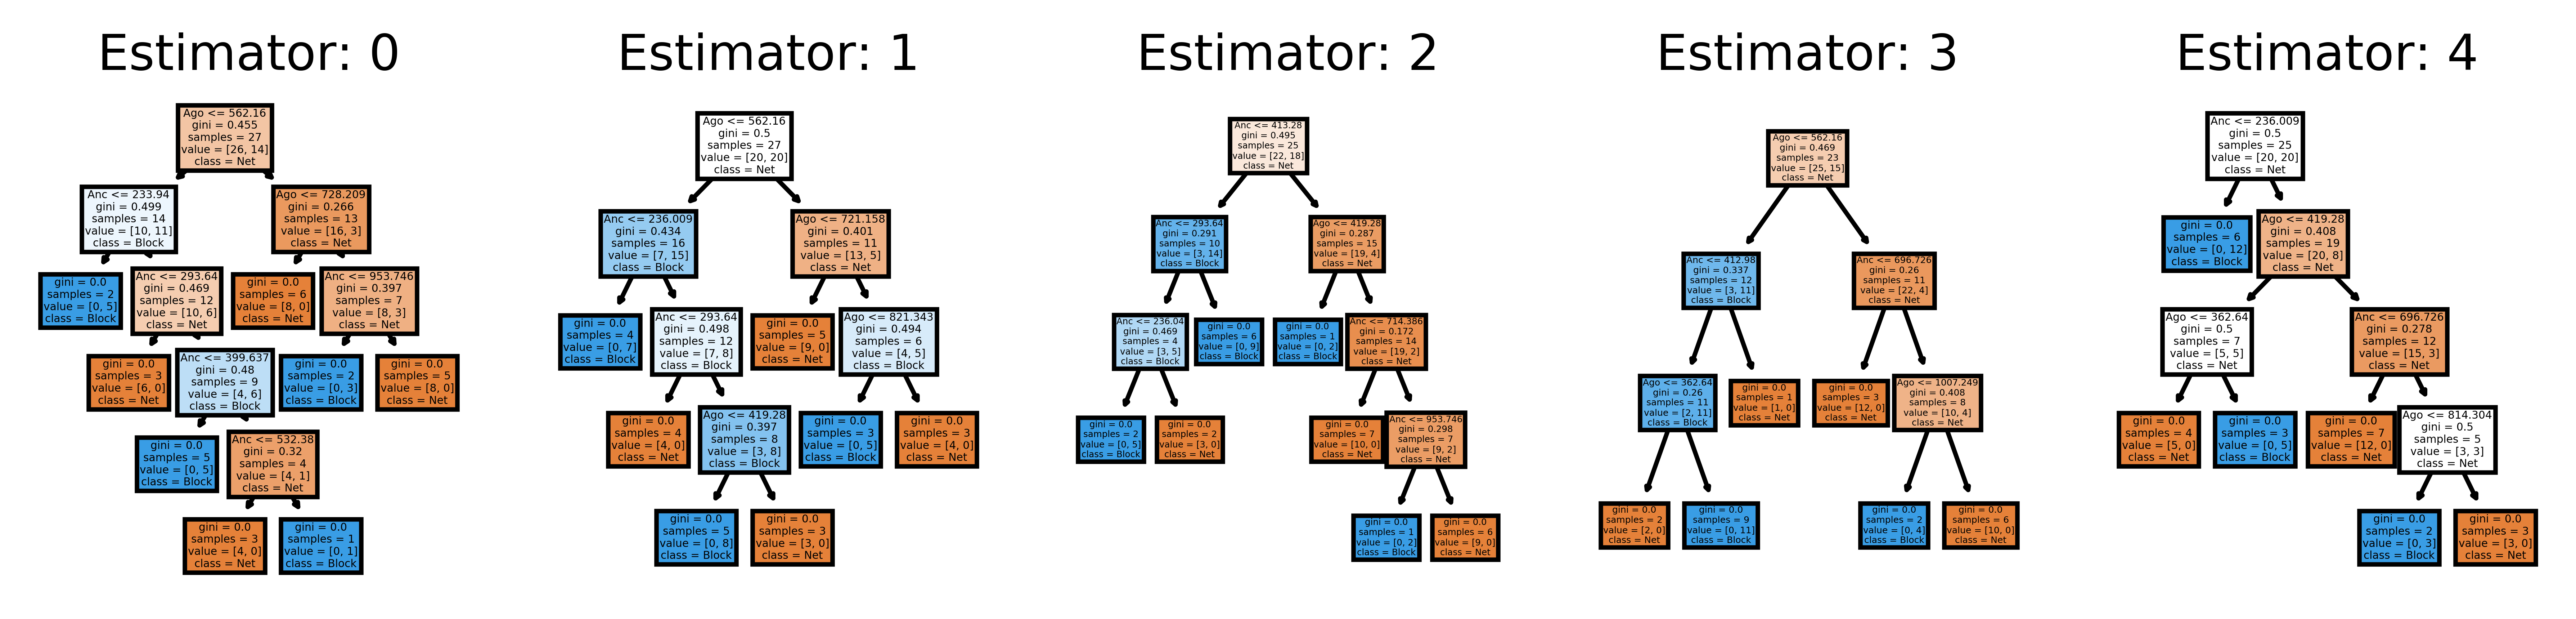

In [111]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)

for index in range(0, 5):
    tree.plot_tree(clf3.estimators_[index],
                   feature_names = feature_names, 
                   class_names=target_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [166]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [170]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

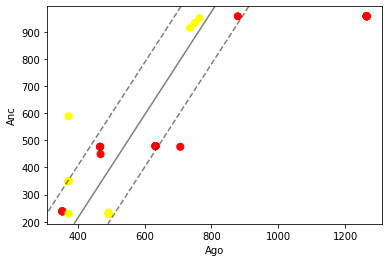

In [171]:
plt.xlabel('Ago')
plt.ylabel('Anc')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [169]:
X=np.array(X)
y=np.array(y)